# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [4]:
# read the iris data into a pandas DataFrame, including column names
iris = pd.read_csv('iris.csv')
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


## Task 2

In [6]:
# gather basic information
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


## Task 3

In [8]:
# use groupby to look for differences between the species
gruplayarak = iris.groupby('species').describe()
print(gruplayarak)

           sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                   

In [9]:
# use sorting to look for differences between the species
print("Sepal Length:")
print(iris.sort_values('sepal_length', ignore_index=True))

Sepal Length:
     sepal_length  sepal_width  petal_length  petal_width    species
0             4.3          3.0           1.1          0.1     setosa
1             4.4          3.0           1.3          0.2     setosa
2             4.4          2.9           1.4          0.2     setosa
3             4.4          3.2           1.3          0.2     setosa
4             4.5          2.3           1.3          0.3     setosa
..            ...          ...           ...          ...        ...
145           7.7          3.8           6.7          2.2  virginica
146           7.7          2.6           6.9          2.3  virginica
147           7.7          2.8           6.7          2.0  virginica
148           7.7          3.0           6.1          2.3  virginica
149           7.9          3.8           6.4          2.0  virginica

[150 rows x 5 columns]


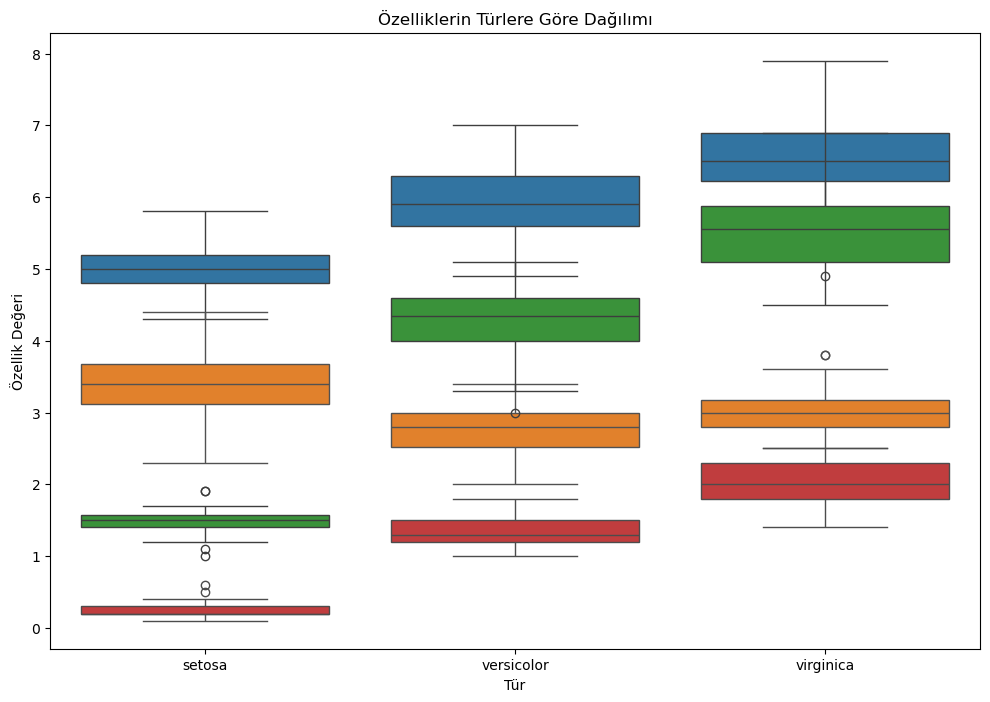

In [10]:
# use plotting to look for differences between the species

import matplotlib.pyplot as plt
import seaborn as sns

setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']
plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal_length', data=iris)
sns.boxplot(x='species', y='sepal_width', data=iris)
sns.boxplot(x='species', y='petal_length', data=iris)
sns.boxplot(x='species', y='petal_width', data=iris)
plt.title('Özelliklerin Türlere Göre Dağılımı')
plt.xlabel('Tür')
plt.ylabel('Özellik Değeri')
plt.show()


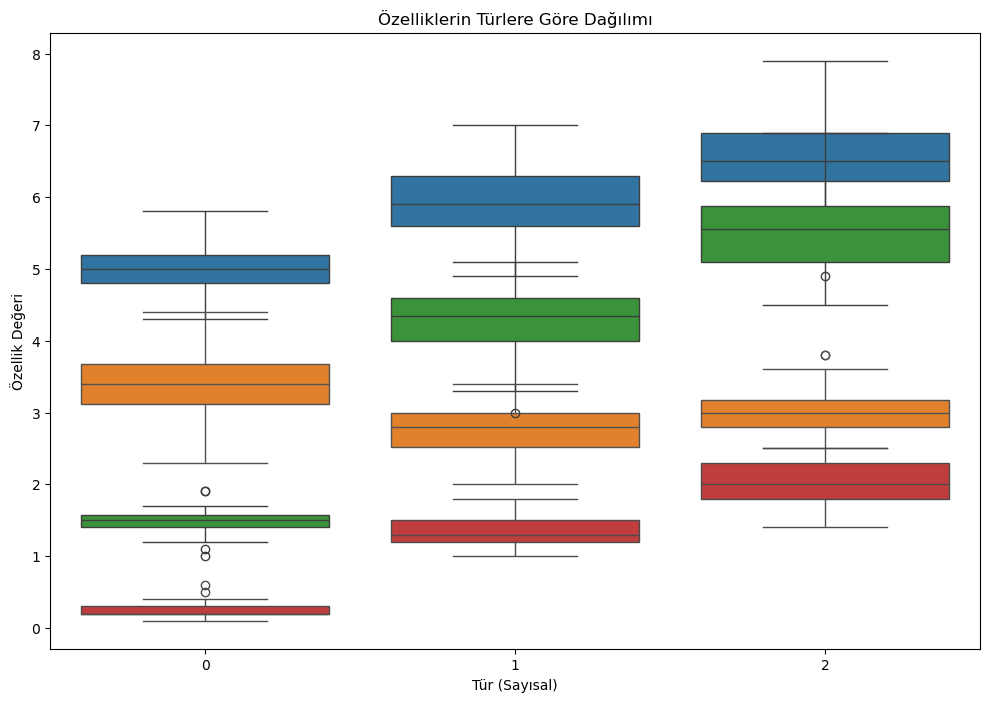

In [11]:
# map species to a numeric value so that plots can be colored by category
import matplotlib.pyplot as plt
import seaborn as sns

#Sayısal değerleriiiiiii
iris['species_num'] = iris['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

plt.figure(figsize=(12, 8))
sns.boxplot(x='species_num', y='sepal_length', data=iris)
sns.boxplot(x='species_num', y='sepal_width', data=iris)
sns.boxplot(x='species_num', y='petal_length', data=iris)
sns.boxplot(x='species_num', y='petal_width', data=iris)
plt.title('Özelliklerin Türlere Göre Dağılımı')
plt.xlabel('Tür (Sayısal)')
plt.ylabel('Özellik Değeri')
plt.show()


## Task 4

## Bonus

In [14]:
# define function that accepts a row of data and returns a predicted species

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

def predict_species(row):
    prediction = clf.predict([row])
    return iris.target_names[prediction[0]]


In [15]:
ornek = [5.8, 2.7, 5.1, 9.5]
predicted_species = predict_species(ornek)
print(f"Tahmin edilen tür: {predicted_species}")

Tahmin edilen tür: virginica
